In [22]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [10]:
# Zalando’s article images consisting of 60,000 training examples and 10,000 test examples. 
# Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.
training_data = datasets.FashionMNIST(root="data",train=True,download=True,transform=ToTensor())

In [11]:
test_data = datasets.FashionMNIST(root="data",train=False,download=True,transform=ToTensor())

In [14]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [19]:
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [17]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

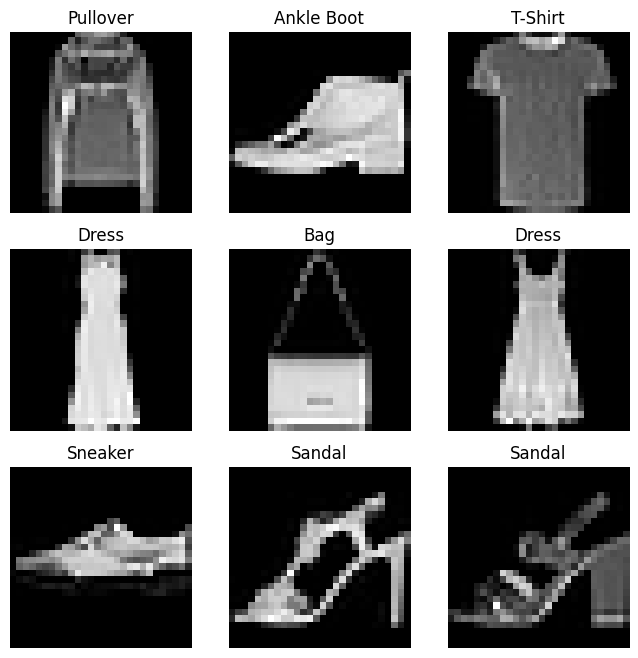

In [23]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [28]:
from torchvision.transforms import ToTensor
from torchvision.transforms import Lambda

In [29]:
ds = datasets.FashionMNIST(download=True,train=True,root="data",transform=ToTensor(),
                           target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))

In [30]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

In [31]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


In [32]:
from torch import nn

In [37]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [38]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

In [40]:
X = torch.rand(1,28,28, device=device)
X

tensor([[[6.5964e-01, 2.7175e-01, 8.0322e-01, 5.7988e-01, 2.9484e-01,
          5.9877e-01, 5.2387e-01, 7.8840e-01, 8.1273e-01, 9.0044e-01,
          9.0222e-01, 5.3111e-01, 7.5498e-01, 2.8637e-01, 3.4478e-01,
          1.5780e-02, 9.9856e-01, 8.8601e-01, 9.6233e-01, 5.6270e-01,
          1.5282e-01, 4.5926e-01, 1.2801e-01, 8.5957e-01, 4.7317e-01,
          4.3621e-01, 1.9571e-03, 3.9781e-01],
         [5.0982e-01, 9.0117e-01, 1.3649e-04, 7.1371e-01, 1.9104e-01,
          2.3231e-01, 8.4108e-01, 4.5080e-01, 5.5830e-01, 8.3988e-01,
          3.5731e-01, 5.9606e-01, 7.5940e-01, 3.0668e-01, 7.9577e-01,
          6.5464e-01, 3.0165e-01, 5.1389e-01, 3.1240e-01, 9.2633e-01,
          7.4786e-01, 1.1683e-01, 5.2096e-01, 1.5060e-01, 4.9674e-01,
          1.0299e-01, 6.6871e-01, 8.3361e-01],
         [4.4850e-01, 5.1315e-01, 6.9594e-01, 8.2774e-01, 5.8123e-01,
          3.0148e-01, 5.2412e-01, 4.0596e-01, 1.9484e-01, 5.8070e-02,
          2.8378e-01, 6.2616e-01, 8.5470e-01, 2.4873e-01, 1.5152e-

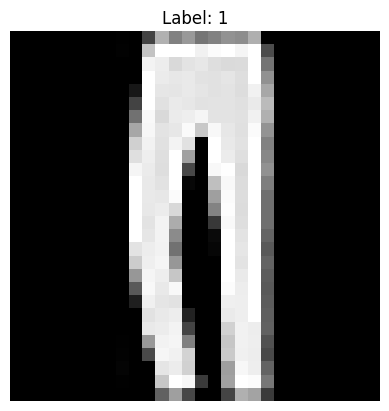

In [43]:
image, label = test_data[2]   # 3rd image (index starts at 0)

plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()

In [44]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [45]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [46]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])
